In [135]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')
from sklearn import datasets, svm

# DATA PREPROCESSING
dataset = pd.read_csv("../Datasets/Iris.csv")
dataset["sepal width (cm)"] = dataset["SepalWidthCm"]
dataset["petal length (cm)"] = dataset["PetalLengthCm"]
dataset["petal width (cm)"] = dataset["PetalWidthCm"]
dataset["sepal length (cm)"] = dataset["SepalLengthCm"]
dataset["species"] = dataset["Species"].astype("category").cat.codes
revised_dataset = dataset.drop(['SepalLengthCm', 'PetalLengthCm', 'PetalWidthCm', "SepalWidthCm", "Species"], axis = 1)
revised_dataset.drop(["Id","species"],axis=1).corr()

,sepal width (cm),petal length (cm),petal width (cm),sepal length (cm)
sepal width (cm),1.000000,-0.420516,-0.356544,-0.109369
petal length (cm),-0.420516,1.000000,0.962757,0.871754
petal width (cm),-0.356544,0.962757,1.000000,0.817954
sepal length (cm),-0.109369,0.871754,0.817954,1.000000


(array([41.,  8.,  1.,  7.,  8., 33.,  6., 23.,  9., 14.]),
 array([0.1 , 0.34, 0.58, 0.82, 1.06, 1.3 , 1.54, 1.78, 2.02, 2.26, 2.5 ]),
 <a list of 10 Patch objects>)

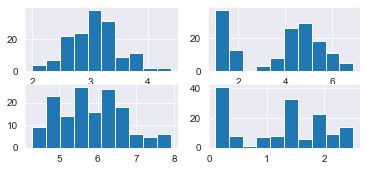

In [170]:
#CHECKING FOR NORMAL DISTRIBUTION

plt.subplot(321)
plt.hist(revised_dataset["sepal width (cm)"])
plt.subplot(322)
plt.hist(revised_dataset["petal length (cm)"])
plt.subplot(323)
plt.hist(revised_dataset["sepal length (cm)"])
plt.subplot(324)
plt.hist(revised_dataset["petal width (cm)"])

In [138]:
from sklearn.preprocessing import StandardScaler

#DEFINING TARGET AND PREDICTORS
X = revised_dataset.drop(["Id","species","petal width (cm)"],axis=1 )
y = revised_dataset["petal width (cm)"]

#SCALING DATA TO NORMAL DISTRIBUTION
scaler  = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [139]:
from sklearn.model_selection import train_test_split

#SPLITTING DATA TO TRAIN, TEST, VALIDATION

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y.values, test_size = 0.2, random_state = 25)
X_validation, X_test,y_validation, y_test = train_test_split(X_test,y_test, test_size = 0.5,random_state = 25)
len(X_train)

120

In [140]:
from sklearn.linear_model import Lasso


#LASSO CROSS VALIDATION

mse_array = []
lambdas = np.logspace(-10,0.0000001,200)
for i in lambdas:
    clf = Lasso(alpha = i)
    clf.fit(X_train, y_train)
    pred = clf.predict(X_validation)
    
    mse = 0
    for j in range(len(pred)):
        mse+=(abs(pred[j]-y_validation[j]))**2
    mse_array.append([mse,i])

In [176]:
alpha = min(mse_array)[1]

[0.275478723530648, 0.0034489628590135307]

In [142]:
#FITTING AND PREDICTING MODEL FOR TEST SET

clf = Lasso(alpha = alpha)
clf.fit(X_train, y_train)
predTest = clf.predict(X_test)


In [143]:
#CALCULATING MSE FOR TEST SET


mseTest = 0
for i in range(len(predTest)):
    mseTest+=(abs(predTest[i]-y_test[i]))**2


In [172]:
#FITTING AND PREDICTING MODEL FOR TRAINING SET

clf = Lasso(alpha = 1*10**-10)
clf.fit(X_train, y_train)
predTrain = clf.predict(X_train)

In [173]:
#CALCULATING MSE FOR TRAINING SET

mseTrain = 0
for i in range(len(predTrain)):
    mseTrain+=(abs(predTrain[i]-y_train[i]))**2

In [174]:
print(f"the mse for test set is {mseTest/(len(predTest))} and the mse for the train set is {mseTrain/(len(predTrain))}")

the mse for test set is 0.0394707373056451 and the mse for the train set is 0.03790286631010364


In [171]:
#COMPUTING COEFFICIENTS FOR EACH LAMBDA IN LAMBDAS

z = []
for i in lambdas:
    clf = Lasso(alpha = i, max_iter = 1000000)
    clf.fit(X_train, y_train)
    z.append(clf.coef_)
z   

[array([ 0.10776443,  0.94071953, -0.16932443]),
 array([ 0.10776443,  0.94071953, -0.16932443]),
 array([ 0.10776443,  0.94071953, -0.16932443]),
 array([ 0.10776443,  0.94071953, -0.16932443]),
 array([ 0.10776443,  0.94071953, -0.16932443]),
 array([ 0.10776443,  0.94071953, -0.16932443]),
 array([ 0.10776443,  0.94071953, -0.16932443]),
 array([ 0.10776443,  0.94071953, -0.16932443]),
 array([ 0.10776443,  0.94071953, -0.16932443]),
 array([ 0.10776443,  0.94071953, -0.16932443]),
 array([ 0.10776443,  0.94071953, -0.16932443]),
 array([ 0.10776443,  0.94071953, -0.16932443]),
 array([ 0.10776443,  0.94071953, -0.16932443]),
 array([ 0.10776443,  0.94071952, -0.16932443]),
 array([ 0.10776443,  0.94071952, -0.16932442]),
 array([ 0.10776443,  0.94071952, -0.16932442]),
 array([ 0.10776443,  0.94071952, -0.16932442]),
 array([ 0.10776442,  0.94071952, -0.16932442]),
 array([ 0.10776442,  0.94071952, -0.16932442]),
 array([ 0.10776442,  0.94071952, -0.16932442]),
 array([ 0.10776442,

Text(0.5, 1.0, 'Lasso Coefficients for Petal Width as a Function of Regularization')

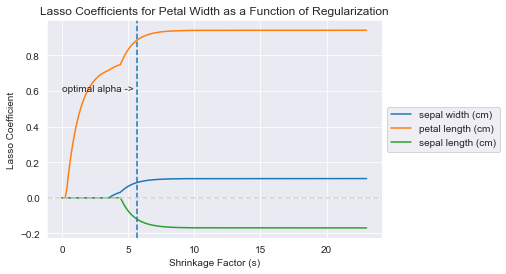

In [157]:
import plotly.express as px

#LASSO PLOT

fig,ax = plt.subplots(1,1)
ax.plot(-np.log((lambdas)),z)
plt.axvline(x=-np.log(alpha), linestyle = "--")
plt.text(0,0.6,'optimal alpha ->')
plt.axhline(y=0, linestyle = "--", color = "lightgray")
ax.legend(['sepal width (cm)', 'petal length (cm)', 'sepal length (cm)'],loc='center left', bbox_to_anchor=(1, 0.5))#bbox_to_anchor
plt.xlabel('Shrinkage Factor (s)')
plt.ylabel('Lasso Coefficient')
plt.title('Lasso Coefficients for Petal Width as a Function of Regularization')

In [149]:
#LASSO PLOT EXPLANATION

print(f"The petal length (cm) is the best indicator because the coefficient shifts from zero first and has the largest coefficient at the optimal point (dotted line).")

The sepal length (cm) is the best indicator because the coefficient shifts from zero first and has the largest coefficient at the optimal point (dotted line).


In [110]:

revised_dataset.drop(["Id","species"],axis=1).corr()

,sepal width (cm),petal length (cm),petal width (cm),sepal length (cm)
sepal width (cm),1.000000,-0.420516,-0.356544,-0.109369
petal length (cm),-0.420516,1.000000,0.962757,0.871754
petal width (cm),-0.356544,0.962757,1.000000,0.817954
sepal length (cm),-0.109369,0.871754,0.817954,1.000000


In [54]:
print("This makes sense because the petal length (cm) has the highest correlation with the target column (petal width (cm)).")

This makes sense because the PetalLengthCm has the highest correlation with the target column.


(array([37., 13.,  0.,  3.,  8., 26., 29., 18., 11.,  5.]),
 array([-1.56873522, -1.23322757, -0.89771991, -0.56221226, -0.22670461,
         0.10880305,  0.4443107 ,  0.77981835,  1.11532601,  1.45083366,
         1.78634131]),
 <a list of 10 Patch objects>)

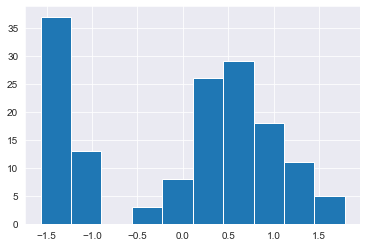